<a href="https://colab.research.google.com/github/lephuocdat2000/AI-Tempo-Run/blob/main/Augment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/AITempoRun/SynthText

/content/gdrive/MyDrive/AITempoRun


In [4]:
!git clone https://github.com/gungui98/SynthText.git

Cloning into 'SynthText'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 52 (delta 0), reused 0 (delta 0), pack-reused 49
Unpacking objects: 100% (52/52), done.
Checking out files: 100% (38/38), done.


In [6]:
cd /content/gdrive/MyDrive/AITempoRun/SynthText

/content/gdrive/MyDrive/AITempoRun/SynthText


In [8]:
!pip install pygame
!pip install wget

     |████████████████████████████████| 11.8 MB 127 kB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9673 sha256=6ac504839d0fbba15b0ec0920286ef4d1880feb3f450b54560e444984136d169
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [33]:
!python gen.py 

pygame 2.0.1 (SDL 2.0.14, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html
getting data..
Storing the output in: results/SynthText.h5
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4528:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5007:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM default
ant+hill_1.jpg
 ** instance # : 0
    ... try text rendering for %s regions 15
    Failure: No text placed.
ant+hill_10.jpg
 ** instance # : 0
    ... try 

total number of images :  1
(2, 4, 97)


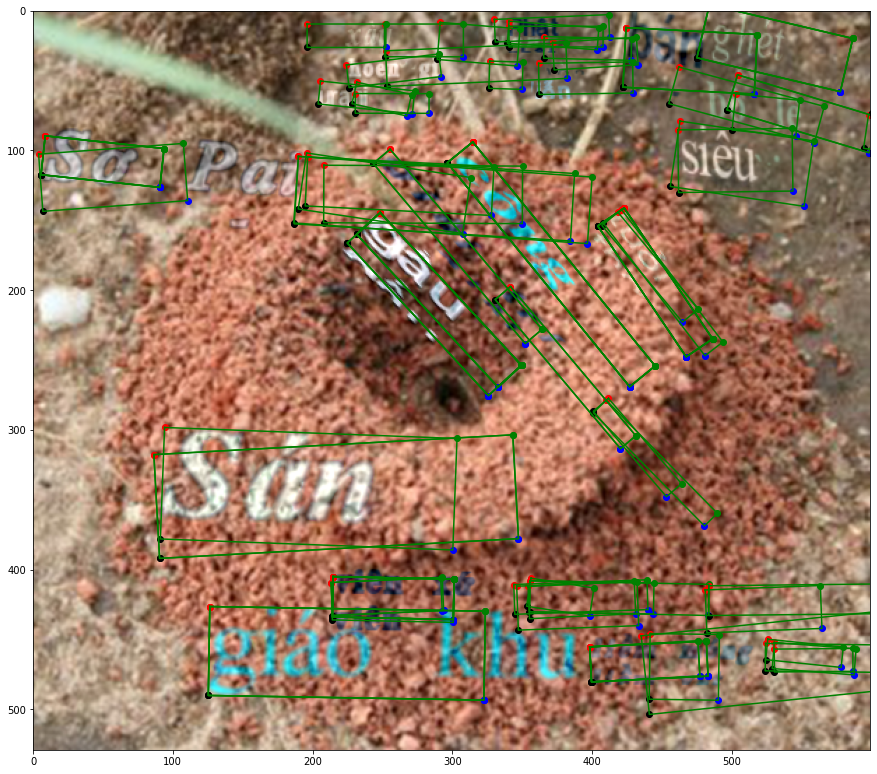

image name        :  ant+hill_10.jpg_0
  ** no. of chars :  337
  ** no. of words :  97
  ** text         :  ['hng' 'gio khu\ngio\ngio l' 'cng\ncng\ncng\ncng\ncng'
 ' b l \n ci  \n ci  \nc c' 'tro' '  xu  \nxu mt' 'Sn\nSn\nsn'
 'gii tr \n  gii   \ngii trc\n  gii   ' 'ght\nght\nght' 'ho' 'hoen g'
 'lim mng\nlim vt\nlim\nlim t\nlim gt' 'gu\ngu\ngu\ngy\ngy\ngy\ngy'
 'siu\nbt ' 'Pht\npht'
 'vin x\nvin\nvin\nbo tng\nvin binh\nvin chng\nvin dn biu\ndn biu Trung'
 'tui\nth\ntui\ntui\ntui\ntui\ntun' 'bn\nbn\nbn' 'din'
 'urani\n ur \n USD ' 'S Pai\ns phm\ns phc\ns qua\ns si' 'quen']


In [34]:

# Author: Ankush Gupta
# Date: 2015

"""
Visualize the generated localization synthetic
data stored in h5 data-bases
"""
from __future__ import division
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt 
import h5py 
from common import *



def viz_textbb(text_im, charBB_list, wordBB, alpha=1.0):
    """
    text_im : image containing text
    charBB_list : list of 2x4xn_i bounding-box matrices
    wordBB : 2x4xm matrix of word coordinates
    """
    plt.close(1)
    plt.figure(1,figsize=(15,15))
    plt.imshow(text_im)
    H,W = text_im.shape[:2]
    # # plot the character-BB:
    # for i in range(len(charBB_list)):
    #     bbs = charBB_list[i]
    #     ni = bbs.shape[-1]
    #     for j in range(ni):
    #         bb = bbs[:,:,j]
    #         bb = np.c_[bb,bb[:,0]]
    #         plt.plot(bb[0,:], bb[1,:], 'r', alpha=alpha/2)
   
    print(wordBB.shape)
    # plot the word-BB:
    for i in range(wordBB.shape[-1]):
        bb = wordBB[:,:,i]
        bb = np.c_[bb,bb[:,0]]
        plt.plot(bb[0,:], bb[1,:], 'g', alpha=alpha)
        # visualize the indiv vertices:
        vcol = ['r','g','b','k']
        for j in range(4):
            plt.scatter(bb[0,j],bb[1,j],color=vcol[j])        

    plt.gca().set_xlim([0,W-1])
    plt.gca().set_ylim([H-1,0])
    plt.show(block=False)

def main(db_fname):
    db = h5py.File(db_fname, 'r')
    dsets = sorted(db['data'].keys())
    print ("total number of images : ", colorize(Color.RED, len(dsets), highlight=True))
    for k in dsets:
        rgb = db['data'][k][...]
        charBB = db['data'][k].attrs['charBB']
        wordBB = db['data'][k].attrs['wordBB']
        txt = db['data'][k].attrs['txt']

        viz_textbb(rgb, [charBB], wordBB)
        print ("image name        : ", colorize(Color.RED, k, bold=True))
        print ("  ** no. of chars : ", colorize(Color.YELLOW, charBB.shape[-1]))
        print ("  ** no. of words : ", colorize(Color.YELLOW, wordBB.shape[-1]))
        print ("  ** text         : ", colorize(Color.GREEN, txt))

        # if 'q' in input("next? ('q' to exit) : "):
        #     break
    db.close()

if __name__=='__main__':
    main('results/SynthText.h5')

